# Plotting maps of LMDZ variables using Cartopy : a quick example

## Loading libraries

In [1]:
import netCDF4
from pylab import *
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

## Reading the netCDF file

In [2]:
ncfile="madeleine_cloud-forcing.nc"
ncgcm = netCDF4.Dataset(ncfile)
# Grid
longi = ncgcm.variables['lon'][:]
lati = ncgcm.variables['lat'][:]
# Variables
SWdnTOA = np.mean(ncgcm.variables['SWdnTOA'][:],axis=0)
SWdnTOAclr = np.mean(ncgcm.variables['SWdnTOAclr'][:],axis=0)
SWupTOA = np.mean(ncgcm.variables['SWupTOA'][:],axis=0)
SWupTOAclr = np.mean(ncgcm.variables['SWupTOAclr'][:],axis=0)
topl = np.mean(ncgcm.variables['topl'][:],axis=0)
topl0 = np.mean(ncgcm.variables['topl0'][:],axis=0)
CREsw6A = (SWdnTOA - SWupTOA) - (SWdnTOAclr - SWupTOAclr)
CRElw6A = topl0 - topl

## Plot user's parameters

In [3]:
dataplt = CREsw6A+CRElw6A
titleplt = r"Net Cloud Radiative Forcing (W m$^{-2}$) - LMDZ6A"
pngfile = 'CREnet6A.png'
#clevs = np.linspace(-20,80,21) # LW
#clevs = np.linspace(-120,0,25) # SW
clevs = np.linspace(-80,20,21) # NET

## Filling the gap at longitude 0

In [4]:
dataplt, longiplt = add_cyclic_point(dataplt, coord=longi)

## 2D maps using the Robinson projection

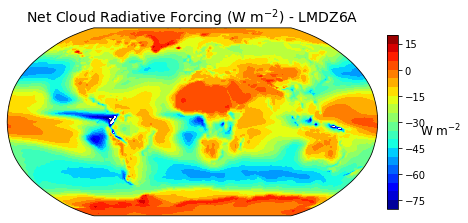

In [5]:
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
plt.contourf(longiplt, lati, dataplt, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title(titleplt, size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label(r'W m$^{-2}$',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

fig.savefig(pngfile, dpi=200)
plt.show()

## 2D maps using a classical equirectangular projection

/home/jmadeleine/PROGRAMS/miniconda3/envs/python3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/jmadeleine/PROGRAMS/miniconda3/envs/python3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


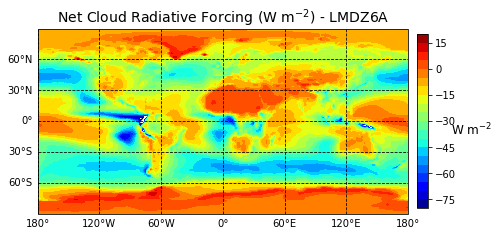

In [6]:
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
gl = ax.gridlines(linestyle='--',color='black',
             draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
plt.contourf(longiplt, lati, dataplt, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title(titleplt, size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label(r'W m$^{-2}$',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

fig.savefig(pngfile, dpi=200)
plt.show()

## Global mean CRF

In [7]:
area = ncgcm.variables['aire'][:]
totarea = np.sum(np.sum(area[:,:],axis=0),axis=0)
print("Annual mean LW CRF (W/m2) : ",
      np.mean(np.mean(CRElw6A[:,:]*area,axis=0),
              axis=0)/totarea*area.size)
print("Annual mean SW CRF (W/m2) : ",
      np.mean(np.mean(CREsw6A[:,:]*area,axis=0),
              axis=0)/totarea*area.size)
print("Annual mean Net CRF (W/m2) : ",np.mean(np.mean(
    (CRElw6A[:,:]+CREsw6A[:,:])*area,axis=0),axis=0)/
      totarea*area.size)

Annual mean LW CRF (W/m2) :  24.97136061452329
Annual mean SW CRF (W/m2) :  -48.32627287879586
Annual mean Net CRF (W/m2) :  -23.354914661496878
